In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../../data/processed/land_dataset_final_v3.csv')

In [17]:
# Show shape and info
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (9272, 234)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Columns: 234 entries, address_subdivision to f_unused
dtypes: float64(4), int64(225), object(5)
memory usage: 16.6+ MB


address_subdivision address_locality address_line_2             h_id  \
count                 9272             9272           9272             9272   
unique                   1               12             96              840   
top             Phnom Penh      Pur SenChey        Ponsang  8865846aebfffff   
freq                  9272             1773            338              126   
mean                   NaN              NaN            NaN              NaN   
std                    NaN              NaN            NaN              NaN   
min                    NaN              NaN            NaN              NaN   
25%                    NaN              NaN            NaN              NaN   
50%                    NaN              NaN            NaN              NaN   
75%                    NaN              NaN            NaN              NaN   
max                    NaN              NaN            NaN              NaN   

        price_per_m2    land_area         price    longitude     latitude  \
count    9272.000000  9272.000000  9.272000e+03  9272.000000  9272.000000   
unique           NaN          NaN           NaN          NaN          NaN   
top              NaN          NaN           NaN          NaN          NaN   
freq             NaN          NaN           NaN          NaN          NaN   
mean     2070.003245   139.976057  2.889783e+05   104.872119    11.554628   
std      2295.542780    63.379229  3.730917e+05     0.066089     0.065278   
min        25.940000    30.000000  2.392320e+03   104.710219    11.412863   
25%       364.085000    86.000000  4.298851e+04   104.822744    11.508944   
50%      1051.575000   140.000000  1.306533e+05   104.885239    11.553634   
75%      3251.960000   196.000000  3.831894e+05   104.919268    11.589735   
max     11886.890000   248.000000  2.486289e+06   105.049988    11.740469   

        near_Koh_Pich_in_km  ...  f_road  f_secondary    f_service  \
count           9272.000000  ...  9272.0  9272.000000  9272.000000   
unique                  NaN  ...     NaN          NaN          NaN   
top                     NaN  ...     NaN          NaN          NaN   
freq                    NaN  ...     NaN          NaN          NaN   
mean              10.564280  ...     0.0     0.068809     0.485764   
std                6.348214  ...     0.0     0.253143     0.499824   
min                0.000000  ...     0.0     0.000000     0.000000   
25%                5.000000  ...     0.0     0.000000     0.000000   
50%               11.000000  ...     0.0     0.000000     0.000000   
75%               16.000000  ...     0.0     0.000000     1.000000   
max               25.000000  ...     0.0     1.000000     1.000000   

            f_steps   f_tertiary      f_track      f_trunk  f_trunk_link  \
count   9272.000000  9272.000000  9272.000000  9272.000000   9272.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean       0.004422     0.223469     0.080242     0.041523      0.006579   
std        0.066354     0.416592     0.271681     0.199507      0.080848   
min        0.000000     0.000000     0.000000     0.000000      0.000000   
25%        0.000000     0.000000     0.000000     0.000000      0.000000   
50%        0.000000     0.000000     0.000000     0.000000      0.000000   
75%        0.000000     0.000000     0.000000     0.000000      0.000000   
max        1.000000     1.000000     1.000000     1.000000      1.000000   

        f_unclassified  f_unused  
count      9272.000000    9272.0  
unique             NaN       NaN  
top                NaN       NaN  
freq               NaN       NaN  
mean          0.078732       0.0  
std           0.269334       0.0  
min           0.000000       0.0  
25%           0.000000       0.0  
50%           0.000000       0.0  
75%           0.000000       

In [46]:
df.isnull().sum()

address_subdivision    0
address_locality       0
address_line_2         0
h_id                   0
price_per_m2           0
                      ..
f_track                0
f_trunk                0
f_trunk_link           0
f_unclassified         0
f_unused               0
Length: 234, dtype: int64

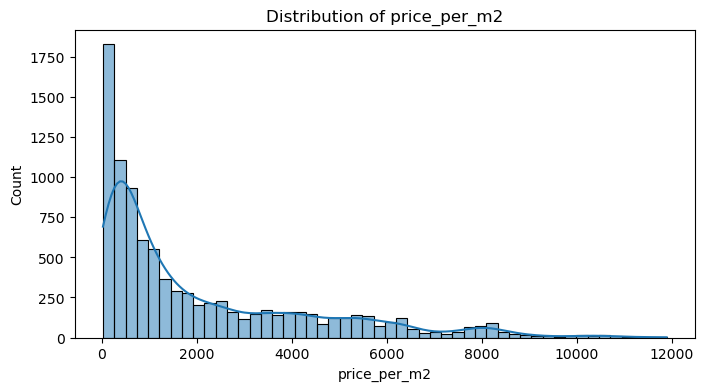

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['price_per_m2'], bins=50, kde=True)
plt.title('Distribution of price_per_m2')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
# Apply Label Encoding to categorical columns
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


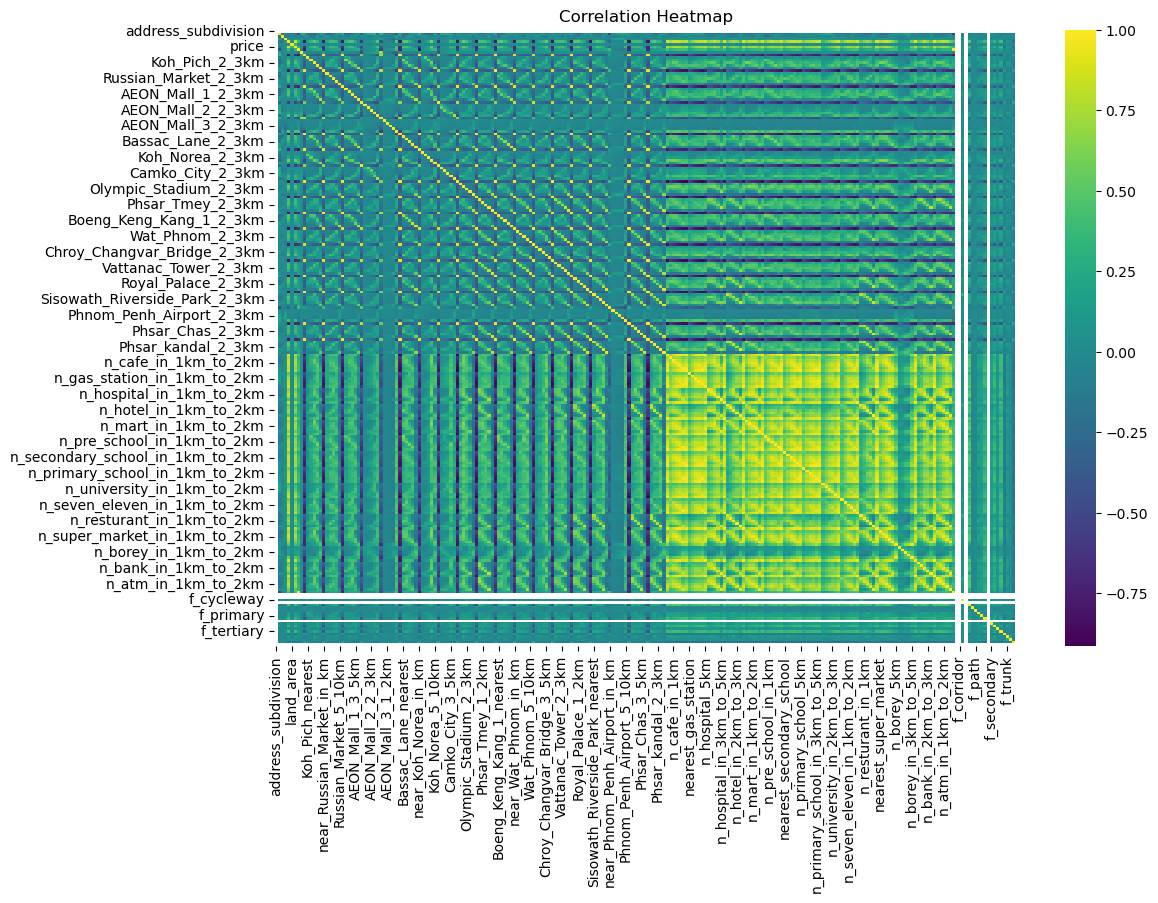

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

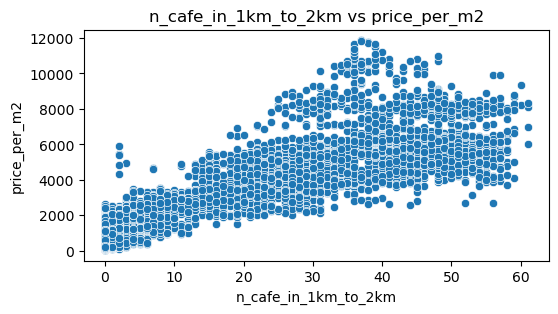

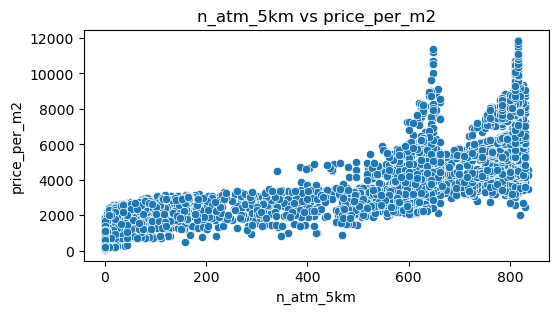

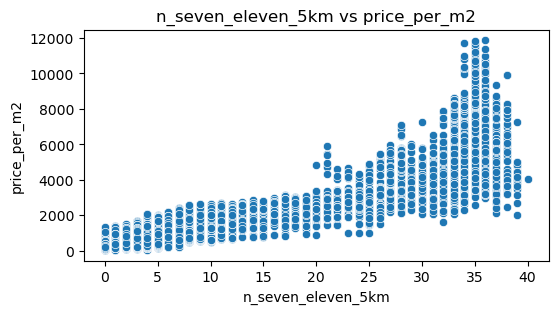

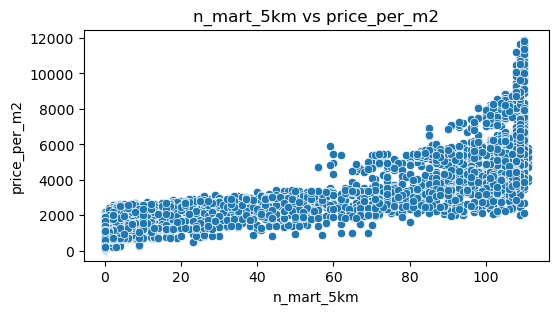

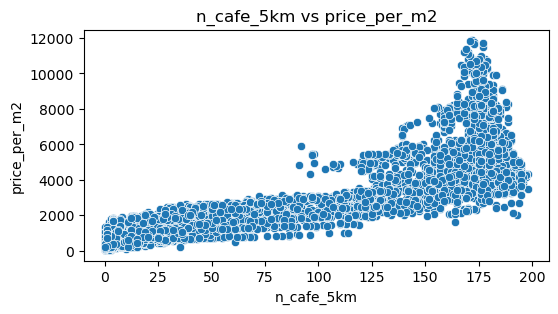

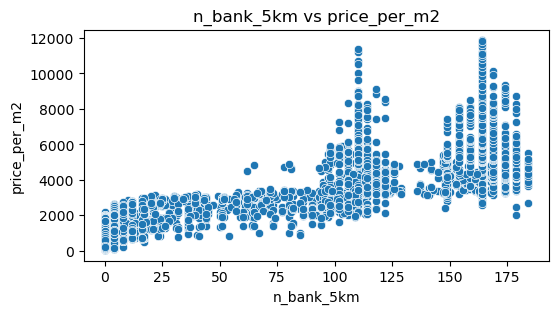

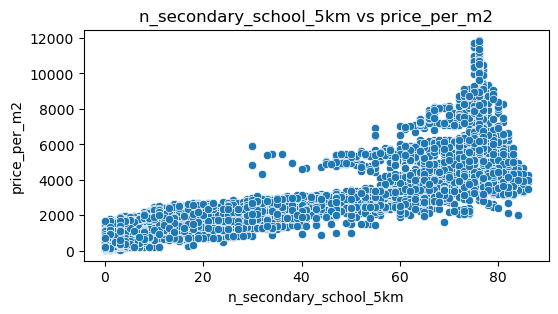

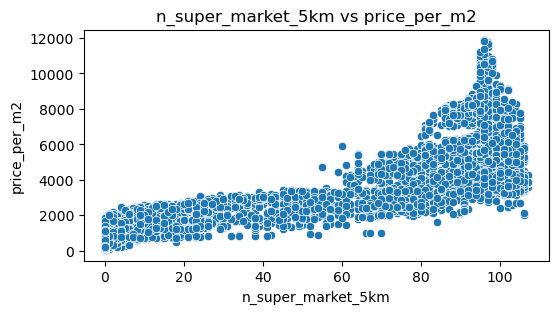

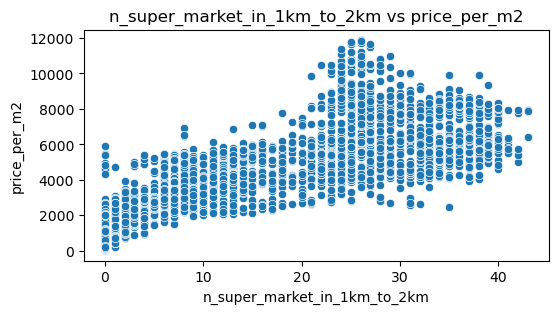

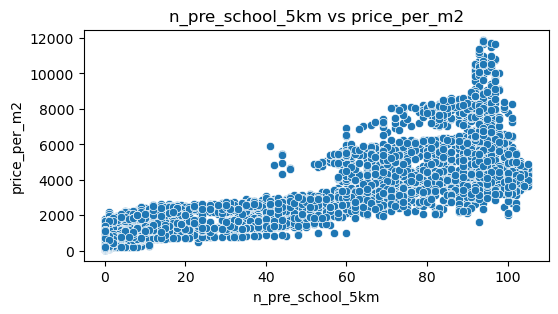

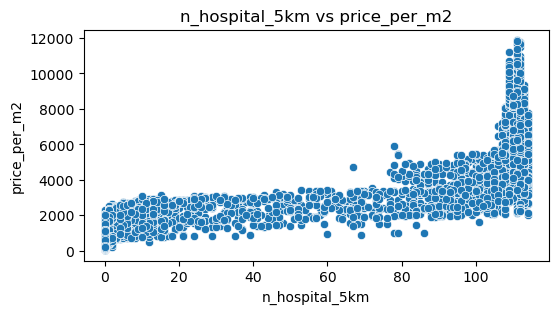

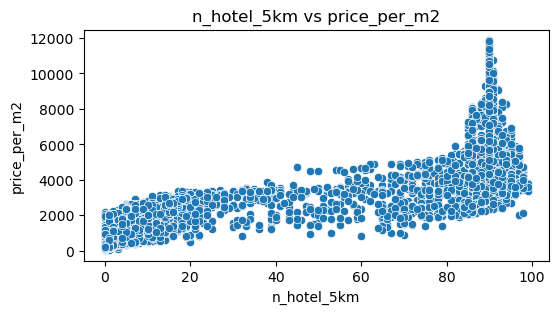

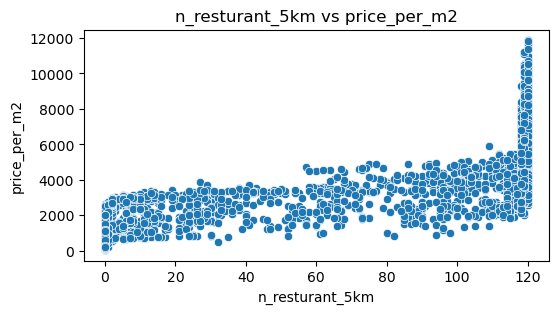

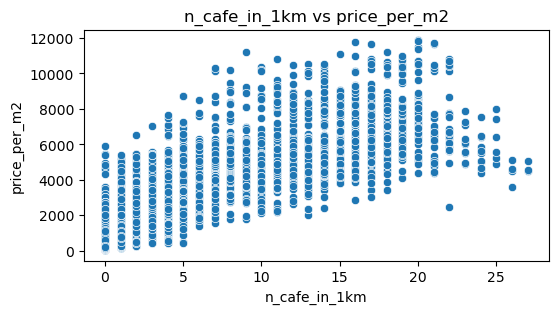

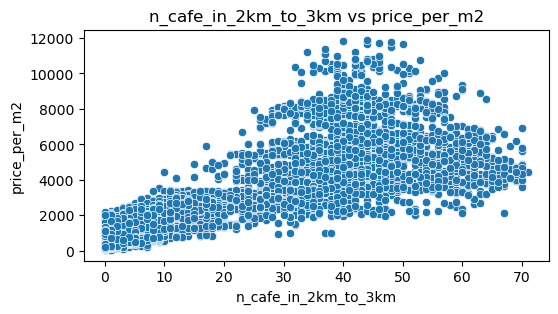

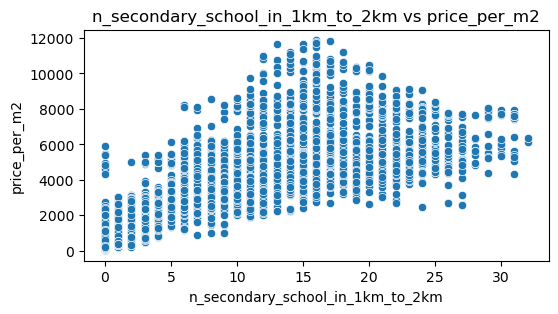

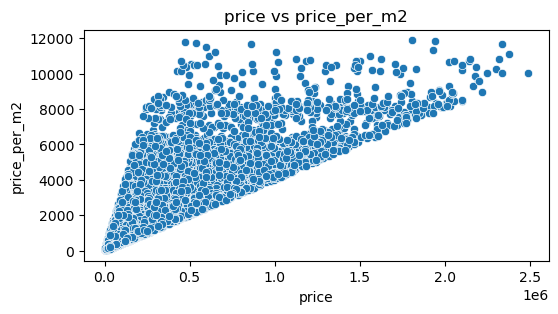

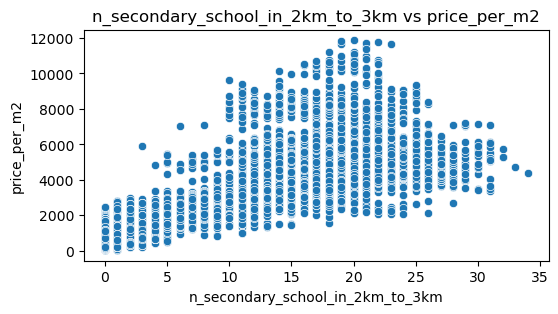

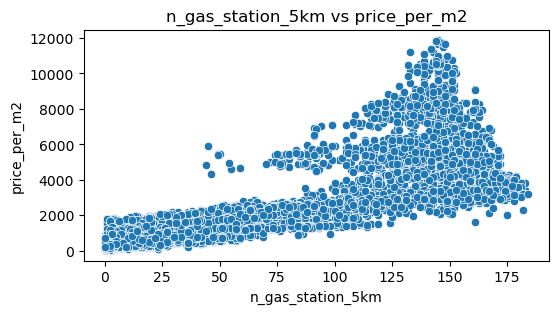

In [22]:
top_features = df_encoded.corr()['price_per_m2'].abs().sort_values(ascending=False)[1:20].index
for col in top_features:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['price_per_m2'])
    plt.title(f'{col} vs price_per_m2')
    plt.show()

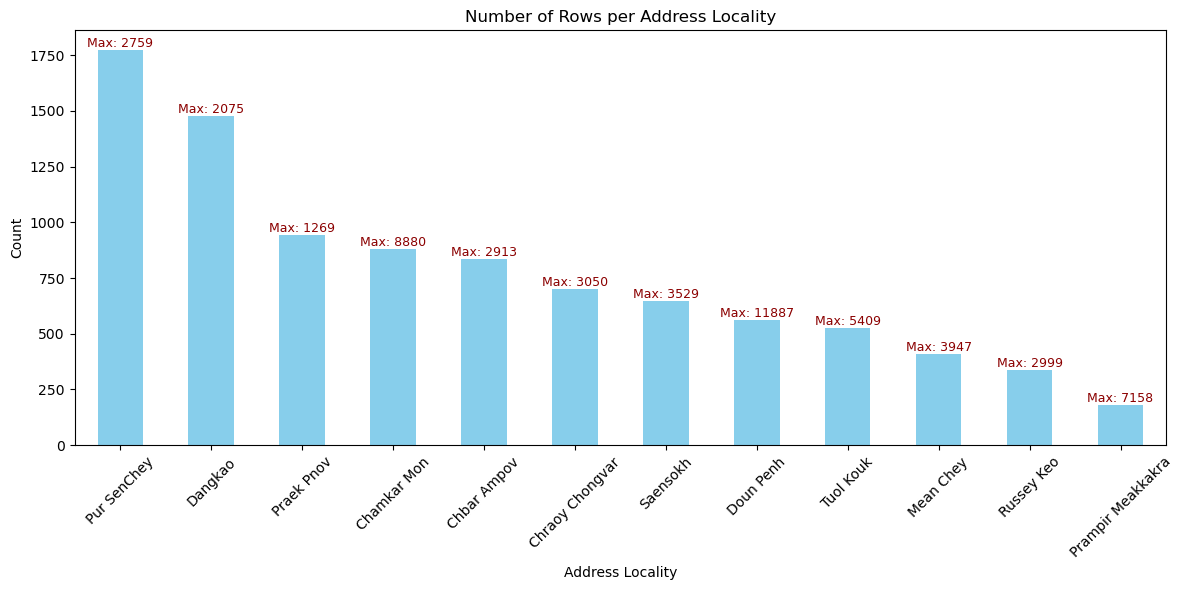

In [23]:
plt.figure(figsize=(12,6))
ax = df['address_locality'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Rows per Address Locality')
plt.xlabel('Address Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Prepare a mapping from locality to max price_per_m2
max_price = df.groupby('address_locality')['price_per_m2'].max()

# Add max price_per_m2 labels on top of each bar
for p in ax.patches:
    locality = p.get_x() + p.get_width() / 2
    label = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()
    price = max_price[label]
    ax.annotate(f'Max: {price:.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='darkred')

plt.show()

In [24]:
kontur = gpd.read_file("D:\CADT\kontur_population_20231101.gpkg\population_clip_cambodia.gpkg", layer='population_clip_cambodia')

Total population in Cambodia (Kontur): 17,028,918


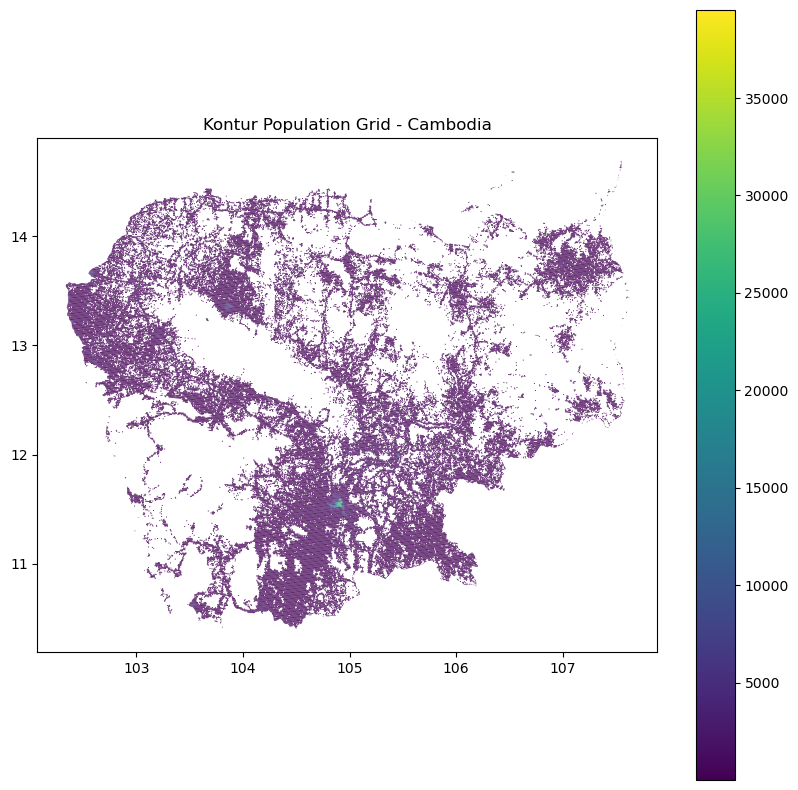

In [25]:
total_population = kontur['population'].sum()
print(f"Total population in Cambodia (Kontur): {total_population:,.0f}")
kontur.plot(column='population', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Kontur Population Grid - Cambodia')
plt.show()

In [26]:
communes = gpd.read_file(r'D:\CADT\kontur_population_20231101.gpkg\CambodiaCommune_Fixed.gpkg')

In [29]:
kontur.head()

h3  population  \
0  886936db6dfffff         4.0   
1  886936db67fffff         9.0   
2  886936db65fffff         9.0   
3  886936db63fffff        23.0   
4  886936db61fffff         9.0   

                                            geometry  
0  MULTIPOLYGON (((107.35 13.782, 107.35 13.787, ...  
1  MULTIPOLYGON (((107.36 13.773, 107.36 13.778, ...  
2  MULTIPOLYGON (((107.35 13.774, 107.35 13.779, ...  
3  MULTIPOLYGON (((107.37 13.78, 107.37 13.785, 1...  
4  MULTIPOLYGON (((107.36 13.781, 107.36 13.786, ...

In [28]:
phnom_penh_communes = communes[communes['ADM1_EN'].str.lower().str.contains('phnom penh')]
phnom_penh_communes.head()

Shape_Leng  Shape_Area                  ADM3_EN ADM3_PCODE ADM3_REF  \
67     0.194762    0.002058                Bak Kaeng   KH121005     None   
114    0.044324    0.000121        Boeng Kak Ti Muoy   KH120407     None   
115    0.055176    0.000140         Boeng Kak Ti Pir   KH120408     None   
118    0.030587    0.000062   Boeng Keng Kang Ti Bei   KH120104     None   
119    0.038194    0.000084  Boeng Keng Kang Ti Muoy   KH120102     None   

    ADM3ALT1EN ADM3ALT2EN          ADM2_EN ADM2_PCODE     ADM1_EN ADM1_PCODE  \
67        None       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12   
114       None       None        Tuol Kouk     KH1204  Phnom Penh       KH12   
115       None       None        Tuol Kouk     KH1204  Phnom Penh       KH12   
118       None       None      Chamkar Mon     KH1201  Phnom Penh       KH12   
119       None       None      Chamkar Mon     KH1201  Phnom Penh       KH12   

      ADM0_EN ADM0_PCODE       date    validOn  \
67   Cambodia         KH 2014-10-14 2018-10-04   
114  Cambodia         KH 2014-10-14 2018-10-04   
115  Cambodia         KH 2014-10-14 2018-10-04   
118  Cambodia         KH 2014-10-14 2018-10-04   
119  Cambodia         KH 2014-10-14 2018-10-04   

                                              geometry  
67   MULTIPOLYGON (((104.96 11.712, 104.96 11.708, ...  
114  MULTIPOLYGON (((104.91 11.583, 104.91 11.58, 1...  
115  MULTIPOLYGON (((104.9 11.578, 104.9 11.574, 10...  
118  MULTIPOLYGON (((104.92 11.544, 104.92 11.543, ...  
119  MULTIPOLYGON (((104.92 11.544, 104.92 11.547, ...

In [30]:
kontur = kontur.to_crs(phnom_penh_communes.crs)

In [31]:
kontur_pp = gpd.sjoin(kontur, phnom_penh_communes, how='inner', predicate='intersects')

In [48]:
df

address_subdivision address_locality     address_line_2             h_id  \
0             Phnom Penh        Mean Chey   Stueng Mean Chey  8865846a91fffff   
1             Phnom Penh      Chamkar Mon  Phsar Daeum Thkov  8865846acbfffff   
2             Phnom Penh         Saensokh   Phnom Penh Thmei  88658468cbfffff   
3             Phnom Penh         Saensokh   Phnom Penh Thmei  8865846ab1fffff   
4             Phnom Penh        Doun Penh        Chakto Mukh  8865846a39fffff   
...                  ...              ...                ...              ...   
9267          Phnom Penh  Chraoy Chongvar          Bak Kaeng  886586a699fffff   
9268          Phnom Penh  Chraoy Chongvar      Preaek Ta Sek  8865846995fffff   
9269          Phnom Penh       Praek Pnov            Ponsang  8865846d85fffff   
9270          Phnom Penh      Pur SenChey            Kantaok  8865846e31fffff   
9271          Phnom Penh       Praek Pnov           Samraong  886580d00bfffff   

      price_per_m2  land_area       price   longitude   latitude  \
0          3357.98         52   174614.96  104.883100  11.552932   
1          3809.30        178   678055.40  104.915003  11.528833   
2          3437.03        138   474310.14  104.886163  11.586713   
3          3469.70        162   562091.40  104.889529  11.575790   
4          5442.34        200  1088468.00  104.958218  11.558388   
...            ...        ...         ...         ...        ...   
9267        729.57        182   132781.74  104.929226  11.701893   
9268        571.98        212   121259.76  104.899855  11.667508   
9269        260.40        134    34893.60  104.756877  11.633307   
9270       1093.83        230   251580.90  104.785133  11.523526   
9271        201.59        150    30238.50  104.818512  11.719658   

      near_Koh_Pich_in_km  ...  f_road  f_secondary  f_service  f_steps  \
0                       6  ...       0            1          1        0   
1                       3  ...       0            0          0        0   
2                       7  ...       0            0          1        0   
3                       6  ...       0            0          0        0   
4                       1  ...       0            0          0        0   
...                   ...  ...     ...          ...        ...      ...   
9267                   16  ...       0            0          0        0   
9268                   13  ...       0            0          0        0   
9269                   22  ...       0            0          0        0   
9270                   17  ...       0            0          1        0   
9271                   23  ...       0            0          0        0   

      f_tertiary  f_track  f_trunk  f_trunk_link  f_unclassified  f_unused  
0              0        0        0             0               0         0  
1              0        0        0             0               0         0  
2              0        0        0             0               0         0  
3              0        0        0             0               0         0  
4              0        0        0             0               0         0  
...          ...      ...      ...           ...             ...       ...  
9267           0        0        0             0               0         0  
9268           0        0        0             0               0         0  
9269           0        0        0             0               0         0  
9270           0        0        0             0               0         0  
9271           0        0        0             0               0         0  

[9272 rows x 234 columns]

In [32]:
kontur_pp.head()

h3  population  \
38862  886586a6ebfffff       255.0   
38868  886586a6ddfffff      1337.0   
38869  886586a6dbfffff       125.0   
38870  886586a6d9fffff       764.0   
38871  886586a6d7fffff       323.0   

                                                geometry  index_right  \
38862  MULTIPOLYGON (((104.98 11.709, 104.98 11.714, ...          466   
38868  MULTIPOLYGON (((104.96 11.687, 104.96 11.692, ...          466   
38869  MULTIPOLYGON (((104.95 11.681, 104.95 11.686, ...          466   
38870  MULTIPOLYGON (((104.95 11.68, 104.95 11.685, 1...          466   
38871  MULTIPOLYGON (((104.95 11.696, 104.95 11.701, ...          466   

       Shape_Leng  Shape_Area    ADM3_EN ADM3_PCODE ADM3_REF ADM3ALT1EN  \
38862    0.209855    0.001835  Kaoh Dach   KH121004     None       None   
38868    0.209855    0.001835  Kaoh Dach   KH121004     None       None   
38869    0.209855    0.001835  Kaoh Dach   KH121004     None       None   
38870    0.209855    0.001835  Kaoh Dach   KH121004     None       None   
38871    0.209855    0.001835  Kaoh Dach   KH121004     None       None   

      ADM3ALT2EN          ADM2_EN ADM2_PCODE     ADM1_EN ADM1_PCODE   ADM0_EN  \
38862       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12  Cambodia   
38868       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12  Cambodia   
38869       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12  Cambodia   
38870       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12  Cambodia   
38871       None  Chraoy Chongvar     KH1210  Phnom Penh       KH12  Cambodia   

      ADM0_PCODE       date    validOn  
38862         KH 2014-10-14 2018-10-04  
38868         KH 2014-10-14 2018-10-04  
38869         KH 2014-10-14 2018-10-04  
38870         KH 2014-10-14 2018-10-04  
38871         KH 2014-10-14 2018-10-04

In [40]:
kontur_pp.columns.tolist()

['h3',
 'population',
 'geometry',
 'index_right',
 'Shape_Leng',
 'Shape_Area',
 'ADM3_EN',
 'ADM3_PCODE',
 'ADM3_REF',
 'ADM3ALT1EN',
 'ADM3ALT2EN',
 'ADM2_EN',
 'ADM2_PCODE',
 'ADM1_EN',
 'ADM1_PCODE',
 'ADM0_EN',
 'ADM0_PCODE',
 'date',
 'validOn']

In [33]:
pp_population = kontur_pp.drop_duplicates(subset='h3', keep='first')

In [34]:
total_population = pp_population['population'].sum()
total_h3 = pp_population['h3'].count()

print(f"Total population in Phnom Penh (Kontur): {total_population:,.0f}")
print(f"Total population in Phnom Penh (Kontur): {total_h3}")

Total population in Phnom Penh (Kontur): 2,395,307
Total population in Phnom Penh (Kontur): 866


In [35]:
import folium

# Get the centroid of Phnom Penh for map center
center = phnom_penh_communes.geometry.unary_union.centroid
m = folium.Map(location=[center.y, center.x], zoom_start=12)

# Add hexagons
for _, row in kontur_pp.iterrows():
    geo_json = folium.GeoJson(row['geometry'], 
                              style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.2})
    geo_json.add_to(m)

# Add boundary
folium.GeoJson(phnom_penh_communes.geometry.unary_union, 
               style_function=lambda x: {'color': 'red', 'weight': 2, 'fillOpacity': 0}).add_to(m)

m

C:\Users\User\AppData\Local\Temp\ipykernel_17240\2099173739.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = phnom_penh_communes.geometry.unary_union.centroid
C:\Users\User\AppData\Local\Temp\ipykernel_17240\2099173739.py:14: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  folium.GeoJson(phnom_penh_communes.geometry.unary_union,


In [36]:
grouping_columns = ['ADM1_EN', 'ADM2_EN', 'ADM3_EN', 'h3']  # Replace with actual column names

grouped_stats = kontur_pp[grouping_columns]

In [37]:
grouped_stats

ADM1_EN          ADM2_EN    ADM3_EN               h3
38862  Phnom Penh  Chraoy Chongvar  Kaoh Dach  886586a6ebfffff
38868  Phnom Penh  Chraoy Chongvar  Kaoh Dach  886586a6ddfffff
38869  Phnom Penh  Chraoy Chongvar  Kaoh Dach  886586a6dbfffff
38870  Phnom Penh  Chraoy Chongvar  Kaoh Dach  886586a6d9fffff
38871  Phnom Penh  Chraoy Chongvar  Kaoh Dach  886586a6d7fffff
...           ...              ...        ...              ...
71625  Phnom Penh       Praek Pnov   Samraong  886580d047fffff
71627  Phnom Penh       Praek Pnov   Samraong  886580d043fffff
71628  Phnom Penh       Praek Pnov   Samraong  886580d041fffff
71640  Phnom Penh       Praek Pnov   Samraong  886580d00bfffff
71641  Phnom Penh       Praek Pnov   Samraong  886580d009fffff

[1470 rows x 4 columns]

In [ ]:
# import geopandas as gpd
# import simplekml

# def gdf_to_kml(gdf, output_file, name_col='h3', desc_col='population'):
#     """
#     Convert GeoDataFrame to KML with proper handling of MultiPolygons
#     :param gdf: GeoDataFrame with geometry
#     :param output_file: Output KML file path
#     :param name_col: Column to use for feature names
#     :param desc_col: Column to use for feature descriptions
#     """
#     kml = simplekml.Kml()
    
#     for idx, row in gdf.iterrows():
#         geom = row.geometry
        
#         # Skip empty or invalid geometries
#         if geom is None or geom.is_empty or not geom.is_valid:
#             continue
            
#         # Extract name and description
#         name = str(row[name_col])
#         desc = f"Population: {row[desc_col]}"
        
#         # Create a Placemark for each feature
#         placemark = kml.newfolder(name=name)  # Using newfolder to create a placemark
        
#         # Set description
#         placemark.description = desc
        
#         # Handle different geometry types
#         if geom.geom_type == 'MultiPolygon':
#             multigeom = placemark.newmultigeometry()
#             for poly in geom.geoms:
#                 kml_poly = multigeom.newpolygon()
#                 kml_poly.outerboundaryis = list(poly.exterior.coords)
#                 for interior in poly.interiors:
#                     kml_poly.newinnerboundary(coords=list(interior.coords))
                
#                 # Apply styling
#                 kml_poly.style.polystyle.color = simplekml.Color.changealphaint(150, 'FF00FF00')  # Green
#                 kml_poly.style.linestyle.width = 1.5
                
#         elif geom.geom_type == 'Polygon':
#             kml_poly = placemark.newpolygon()
#             kml_poly.outerboundaryis = list(geom.exterior.coords)
#             for interior in geom.interiors:
#                 kml_poly.newinnerboundary(coords=list(interior.coords))
                
#             # Apply styling
#             kml_poly.style.polystyle.color = simplekml.Color.changealphaint(150, 'FF00FF00')  # Green
#             kml_poly.style.linestyle.width = 1.5
            
#         else:
#             print(f"Skipping non-polygon geometry: {geom.geom_type}")
    
#     kml.save(output_file)
#     print(f"KML file saved to {output_file}")

# gdf_to_kml(
#     kontur_pp, 
#     output_file="h3_population.kml",
#     name_col='h3',
#     desc_col='population'
# )

KML file saved to h3_population.kml
